## Анализ базы данных астероидов Лоуэловской обсерватории

### Импорт и обработка базы данных

База данных астероидов Солнечной системы взята на [сайте](https://asteroid.lowell.edu/main/astorb/) Лоуэловской обсерватории.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams["figure.figsize"] = (16, 12)

from tqdm.notebook import tqdm
tqdm.pandas()

In [2]:
data = pd.read_table('astorb.dat', sep='\t', header=None)
data.columns = ['string']
#data.head()

In [3]:
def parse(row):
    r = row['string']
    list = []
    
    list.append(r[0:6])
    list.append(r[7:25])
    list.append(r[26:41])
    list.append(r[42:47])
    list.append(r[48:53])
    list.append(r[54:58])
    list.append(r[59:64])
    list.append(r[65:69])
    list.append(r[70:74])
    list.append(r[74:78])
    list.append(r[78:82])
    list.append(r[82:86])
    list.append(r[86:90])
    list.append(r[90:94])
    list.append(r[95:100])
    list.append(r[100:105])
    list.append(r[106:114])
    list.append(r[115:125])
    list.append(r[126:136])
    list.append(r[137:147])
    list.append(r[147:157])
    list.append(r[158:168])
    list.append(r[168:181])
    list.append(r[182:190])
    list.append(r[191:198])
    list.append(r[199:207])
    list.append(r[208:216])
    list.append(r[217:233])
    list.append(r[234:250])
    list.append(r[251:267])

    return list

df = data.progress_apply(parse, axis=1, result_type='expand')

df.columns = ['N', 'name', 'orb_computer', 'abs_magnitude', 'slope_param', 'color_ind', 'IRAS_diam', 'IRAS_tax_class',
              'code_1', 'code_2', 'code_3', 'code_4', 'code_5', 'code_6', 'orb_arc', 'numb_of_obs', 'epoch_of_osc',
              'mean_anomaly', 'arg_of_perihelion', 'long_of_asc_node', 'inclination', 'eccentricity', 'semim_axis',
              'date_of_orb_comp', 'abs_value_of_the_CEU', 'rate_of_change_of_CEU', 'date_of_CEU', 'next_PEU_date_occur',
              'great_PEU_10_years_date_occur', 'great_PEU_10_years_date_PEU_date_occur']                

#df.head()

  0%|          | 0/1218908 [00:00<?, ?it/s]

In [4]:
df['N'] = pd.to_numeric(df['N'], errors='coerce').fillna(0).astype('int32')
df['abs_magnitude'] = pd.to_numeric(df['abs_magnitude'], errors='coerce')
df['slope_param'] = pd.to_numeric(df['slope_param'], errors='coerce')
df['color_ind'] = pd.to_numeric(df['color_ind'], errors='coerce')
df['IRAS_diam'] = pd.to_numeric(df['IRAS_diam'], errors='coerce')
df['code_1'] = pd.to_numeric(df['code_1'], errors='coerce').fillna(255).astype('uint8')
df['code_2'] = pd.to_numeric(df['code_2'], errors='coerce').fillna(255).astype('uint8')
df['code_3'] = pd.to_numeric(df['code_3'], errors='coerce').fillna(255).astype('uint8')
df['code_4'] = pd.to_numeric(df['code_4'], errors='coerce').fillna(255).astype('uint8')
df['code_5'] = pd.to_numeric(df['code_5'], errors='coerce').fillna(255).astype('uint8')
df['code_6'] = pd.to_numeric(df['code_6'], errors='coerce').fillna(255).astype('uint8')
df['orb_arc'] = pd.to_numeric(df['orb_arc'], errors='coerce')
df['numb_of_obs'] = pd.to_numeric(df['numb_of_obs'], errors='coerce')
df['epoch_of_osc'] = pd.to_datetime(df['epoch_of_osc'], format='%Y%m%d', errors='coerce')
df['mean_anomaly'] = pd.to_numeric(df['mean_anomaly'], errors='coerce')
df['arg_of_perihelion'] = pd.to_numeric(df['arg_of_perihelion'], errors='coerce')
df['long_of_asc_node'] = pd.to_numeric(df['long_of_asc_node'], errors='coerce')
df['inclination'] = pd.to_numeric(df['inclination'], errors='coerce')
df['eccentricity'] = pd.to_numeric(df['eccentricity'], errors='coerce')
df['semim_axis'] = pd.to_numeric(df['semim_axis'], errors='coerce')
df['date_of_orb_comp'] = pd.to_datetime(df['date_of_orb_comp'], format='%Y%m%d', errors='coerce')
df['date_of_CEU'] = pd.to_datetime(df['date_of_CEU'], format='%Y%m%d', errors='coerce')

#df.info()

In [5]:
df = df[['name', 'abs_magnitude', 'orb_arc', 'numb_of_obs', 'epoch_of_osc', 'mean_anomaly', 'arg_of_perihelion',
         'long_of_asc_node', 'inclination', 'eccentricity', 'semim_axis', 'date_of_orb_comp']]

#df.head()

### Распределения астероидов

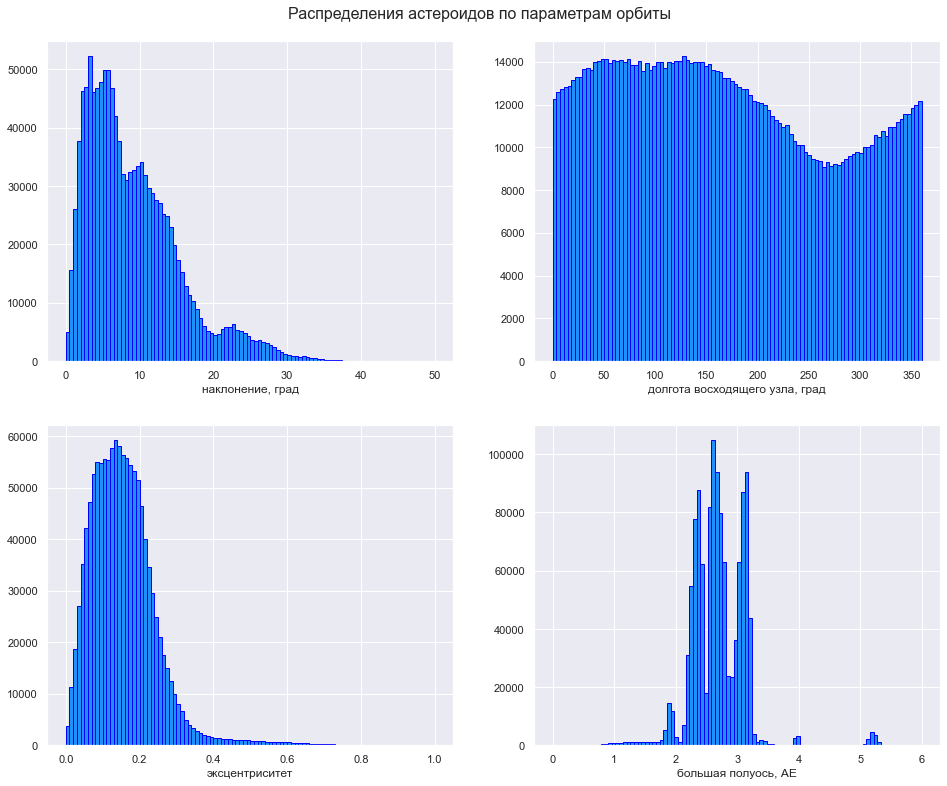

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Распределения астероидов по параметрам орбиты', fontsize=16)
plt.subplots_adjust(top=0.94)

axs[0, 0].hist(df['inclination'], color='dodgerblue', ec='blue', bins=100, range=[0, 50])
axs[0, 0].set_xlabel('наклонение, град')

axs[0, 1].hist(df['long_of_asc_node'], color='dodgerblue', ec='blue', bins=100)
axs[0, 1].set_xlabel('долгота восходящего узла, град')

axs[1, 0].hist(df['eccentricity'], color='dodgerblue', ec='blue', bins=100)
axs[1, 0].set_xlabel('эксцентриситет')

axs[1, 1].hist(df['semim_axis'], color='dodgerblue', ec='blue', bins=100, range=[0, 6])
axs[1, 1].set_xlabel('большая полуось, АЕ')

plt.show()

Разобьем астероиды на разные группы по диапазонам значений большой полуоси $a$ (все величины указаны в астрономических единицах AU):
* $a < 1.5$ — астероиды, движущиеся в области планет земной группы
* $1.5 < a < 5.05$ — объекты главного пояса (приблизительно)
* $5.05 < a < 5.35$ — троянцы Юпитера
* $5.35 < a < 30.1$ — кентавры
* $30.1 < a < 55$ — койперовские объекты

In [7]:
df_eg = df[df['semim_axis'] < 1.5]
df_mb = df.query('1.5 < semim_axis < 5.05')
df_jt = df.query('5.05 < semim_axis < 5.35')
df_c = df.query('5.35 < semim_axis < 30.1')
df_ko = df.query('30.1 < semim_axis < 55')

#### Астероиды земной группы

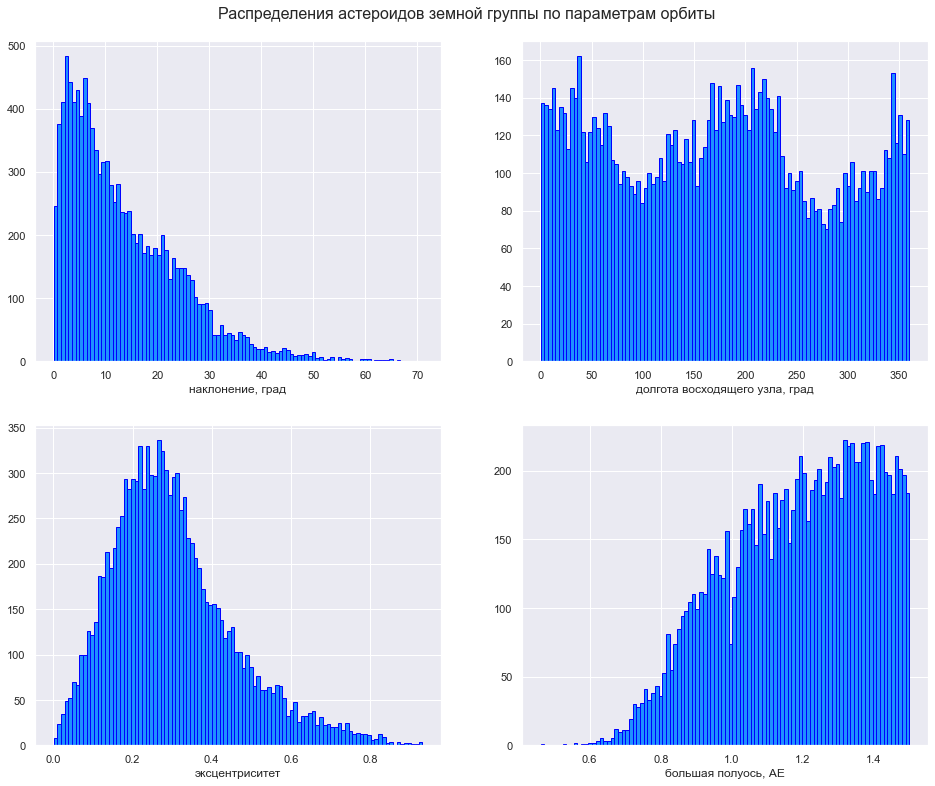

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Распределения астероидов земной группы по параметрам орбиты', fontsize=16)
plt.subplots_adjust(top=0.94)

axs[0, 0].hist(df_eg['inclination'], color='dodgerblue', ec='blue', bins=100)
axs[0, 0].set_xlabel('наклонение, град')

axs[0, 1].hist(df_eg['long_of_asc_node'], color='dodgerblue', ec='blue', bins=100)
axs[0, 1].set_xlabel('долгота восходящего узла, град')

axs[1, 0].hist(df_eg['eccentricity'], color='dodgerblue', ec='blue', bins=100)
axs[1, 0].set_xlabel('эксцентриситет')

axs[1, 1].hist(df_eg['semim_axis'], color='dodgerblue', ec='blue', bins=100)
axs[1, 1].set_xlabel('большая полуось, АЕ')

plt.show()

#### Троянские астероиды Юпитера

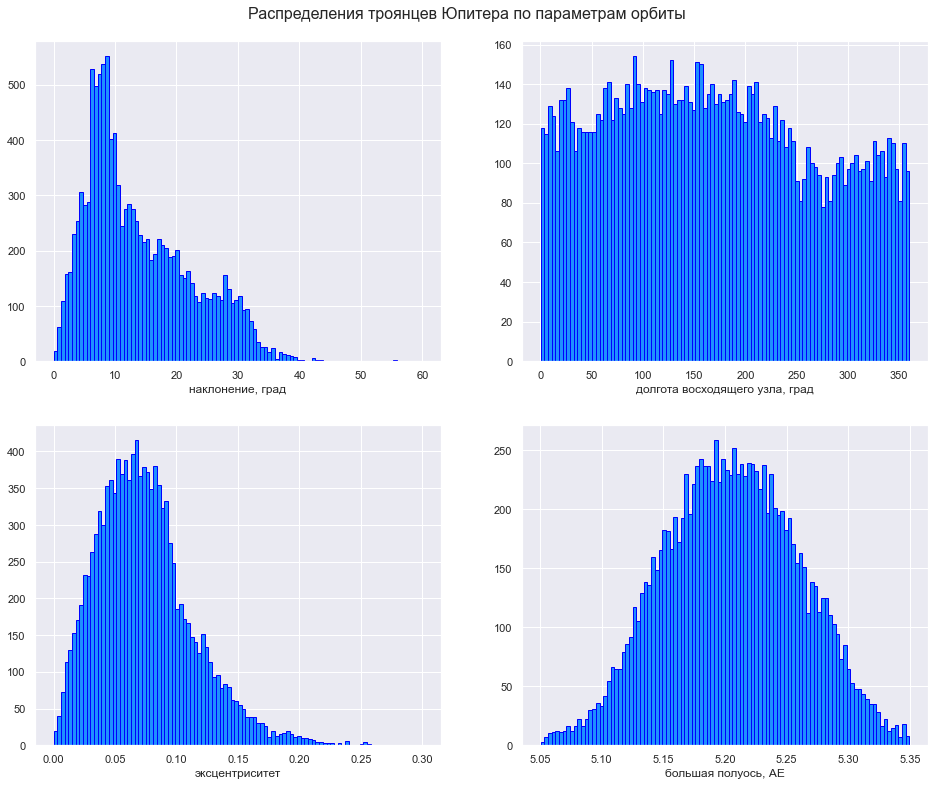

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Распределения троянцев Юпитера по параметрам орбиты', fontsize=16)
plt.subplots_adjust(top=0.94)

axs[0, 0].hist(df_jt['inclination'], color='dodgerblue', ec='blue', bins=100, range=[0, 60])
axs[0, 0].set_xlabel('наклонение, град')

axs[0, 1].hist(df_jt['long_of_asc_node'], color='dodgerblue', ec='blue', bins=100)
axs[0, 1].set_xlabel('долгота восходящего узла, град')

axs[1, 0].hist(df_jt['eccentricity'], color='dodgerblue', ec='blue', bins=100, range=[0, 0.3])
axs[1, 0].set_xlabel('эксцентриситет')

axs[1, 1].hist(df_jt['semim_axis'], color='dodgerblue', ec='blue', bins=100)
axs[1, 1].set_xlabel('большая полуось, АЕ')

plt.show()

#### Кентавры

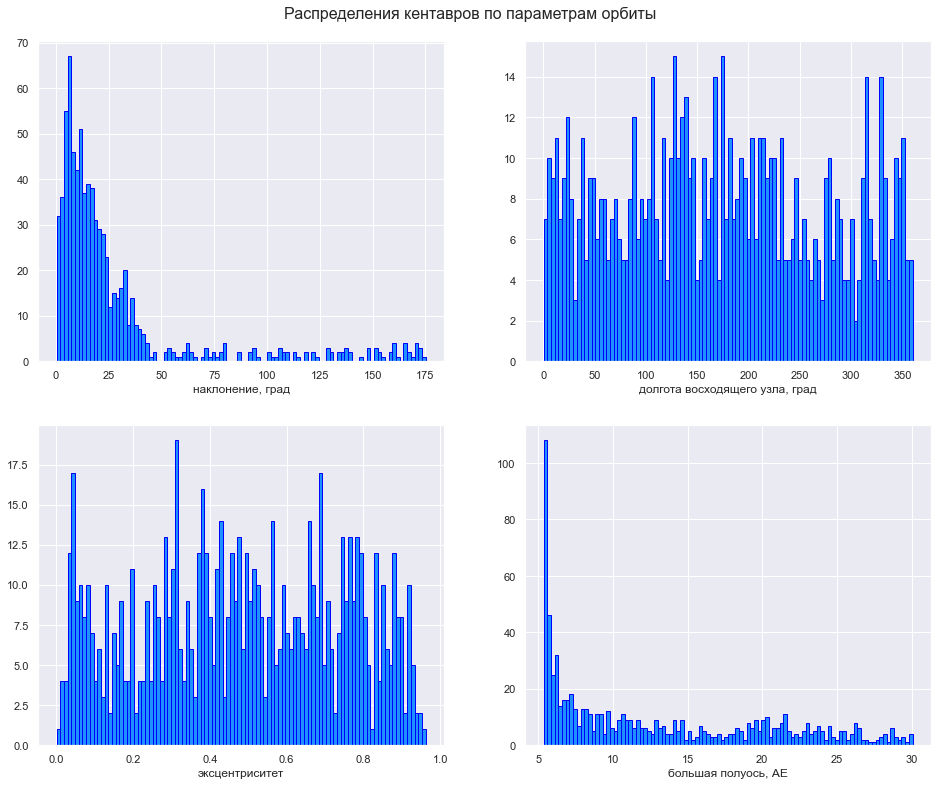

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Распределения кентавров по параметрам орбиты', fontsize=16)
plt.subplots_adjust(top=0.94)

axs[0, 0].hist(df_c['inclination'], color='dodgerblue', ec='blue', bins=100)
axs[0, 0].set_xlabel('наклонение, град')

axs[0, 1].hist(df_c['long_of_asc_node'], color='dodgerblue', ec='blue', bins=100)
axs[0, 1].set_xlabel('долгота восходящего узла, град')

axs[1, 0].hist(df_c['eccentricity'], color='dodgerblue', ec='blue', bins=100)
axs[1, 0].set_xlabel('эксцентриситет')

axs[1, 1].hist(df_c['semim_axis'], color='dodgerblue', ec='blue', bins=100)
axs[1, 1].set_xlabel('большая полуось, АЕ')

plt.show()

#### Койперовские объекты

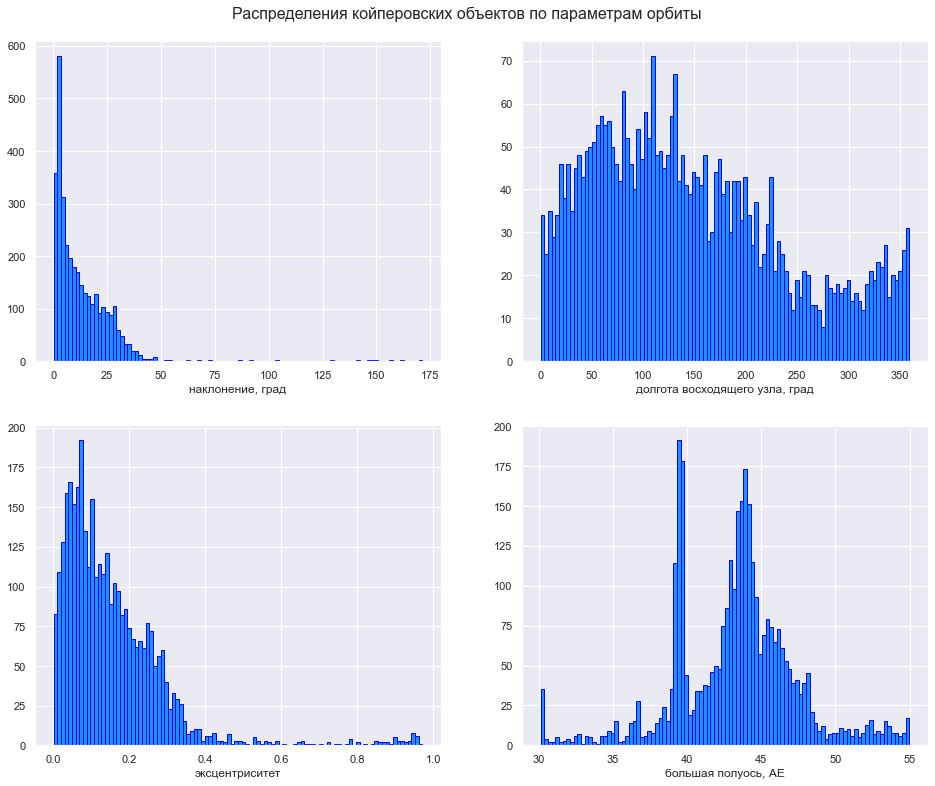

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Распределения койперовских объектов по параметрам орбиты', fontsize=16)
plt.subplots_adjust(top=0.94)

axs[0, 0].hist(df_ko['inclination'], color='dodgerblue', ec='blue', bins=100)
axs[0, 0].set_xlabel('наклонение, град')

axs[0, 1].hist(df_ko['long_of_asc_node'], color='dodgerblue', ec='blue', bins=100)
axs[0, 1].set_xlabel('долгота восходящего узла, град')

axs[1, 0].hist(df_ko['eccentricity'], color='dodgerblue', ec='blue', bins=100)
axs[1, 0].set_xlabel('эксцентриситет')

axs[1, 1].hist(df_ko['semim_axis'], color='dodgerblue', ec='blue', bins=100)
axs[1, 1].set_xlabel('большая полуось, АЕ')

plt.show()

### Астероиды с полярной орбитой

Среди астероидов земной группы и троянцев Юпитера объектов с орбитой близкой к полярной, то есть наклонение которой лежит в диапазоне от 80 до 100 градусов, нет:

In [12]:
df_eg.query('80 < inclination < 100').empty and df_jt.query('80 < inclination < 100').empty

True

Среди астероидов главного пояса всего три таких объекта:

In [13]:
df_mb.query('80 < inclination < 100')

,name,abs_magnitude,orb_arc,numb_of_obs,epoch_of_osc,mean_anomaly,arg_of_perihelion,long_of_asc_node,inclination,eccentricity,semim_axis,date_of_orb_comp
623011,2001 FR222,16.66,7.0,11.0,2022-08-09,127.453537,230.952144,181.339691,80.598254,0.142021,4.809844,2010-03-08
746630,2010 EQ169,17.00,1.0,15.0,2022-08-09,262.843572,59.652463,331.327340,91.583292,0.102086,2.052301,2018-11-02
755755,2010 OA101,18.71,75.0,47.0,2022-08-09,91.652050,197.867282,161.292240,84.381112,0.693249,4.500032,2020-06-21


Среди кентавров и койперовских объектов в базе содержатся по девять объектов соответственно:

In [14]:
df_c.query('80 < inclination < 100')

,name,abs_magnitude,orb_arc,numb_of_obs,epoch_of_osc,mean_anomaly,arg_of_perihelion,long_of_asc_node,inclination,eccentricity,semim_axis,date_of_orb_comp
518150,2016 FH13,10.26,1895.0,100.0,2022-08-09,24.464774,306.670068,176.418744,93.643698,0.615144,24.530310,2021-03-09
653138,2005 SB223,14.17,244.0,50.0,2022-08-09,37.785995,252.580844,219.924879,91.634777,0.905375,29.424653,2008-04-19
727617,2009 FW23,15.36,55.0,170.0,2022-08-09,124.426880,314.866767,180.275670,86.394346,0.855996,11.506432,2009-06-08
866515,2014 JJ57,12.69,2815.0,33.0,2022-08-09,185.442333,311.197568,289.424807,95.894308,0.290383,7.007631,2018-10-09
881424,2014 PP69,20.10,77.0,105.0,2022-08-09,29.415263,311.649660,338.381048,93.701990,0.940939,21.380404,2015-07-10
920396,2015 BH311,15.63,6.0,15.0,2022-08-09,121.251746,255.281155,287.734644,93.475581,0.658441,7.252688,2021-12-31
1035590,2016 TK2,14.86,135.0,45.0,2022-08-09,77.365009,5.635198,323.314754,92.342021,0.551310,9.208681,2017-01-21
1072498,2017 RR2,17.51,96.0,23.0,2022-08-09,41.122707,214.689536,145.406697,87.079185,0.782795,11.640403,2020-02-24
1163300,2020 QO6,18.26,93.0,37.0,2022-08-09,7.434712,193.411677,177.211145,80.489023,0.875489,19.189288,2021-07-03


In [15]:
df_ko.query('80 < inclination < 100')

,name,abs_magnitude,orb_arc,numb_of_obs,epoch_of_osc,mean_anomaly,arg_of_perihelion,long_of_asc_node,inclination,eccentricity,semim_axis,date_of_orb_comp
517716,2015 KZ120,10.15,1994.0,353.0,2022-08-09,3.830505,66.483019,250.044286,85.522982,0.821582,46.926734,2022-06-06
523738,2014 TZ33,11.31,2250.0,96.0,2022-08-09,10.922617,159.228156,171.706267,85.901268,0.754757,38.436833,2018-10-03
871469,2014 MH55,13.88,631.0,25.0,2022-08-09,9.861894,186.331437,67.963947,92.309291,0.899550,44.824413,2021-07-04
970186,2015 TN178,15.27,597.0,65.0,2022-08-09,5.370985,274.755005,226.030510,91.238761,0.955973,54.172639,2017-06-14
1040941,2016 US109,17.17,107.0,96.0,2022-08-09,9.870255,173.639772,256.064316,87.309441,0.947973,35.615772,2021-07-04
1056757,2017 EM4,15.95,153.0,47.0,2022-08-09,10.469933,146.652455,347.130631,83.419772,0.920187,32.999977,2021-07-03
1083714,2017 UX51,10.88,2241.0,134.0,2022-08-09,359.877845,255.086827,217.747364,90.457583,0.747527,30.151629,2022-04-29
1096317,2018 DE4,17.27,125.0,68.0,2022-08-09,8.645800,32.441306,155.103040,81.352392,0.924536,31.690546,2018-06-03
1211960,2021 XS6,16.17,147.0,48.0,2022-08-09,0.761338,354.726624,58.844809,96.907550,0.899258,39.036619,2022-03-10


In [16]:
fig, axs = plt.subplots(3, figsize=(8, 12))
fig.suptitle'Распределения кентавров и койперовских объектов с полярными орбитами \\ по долготе восходящего узла, эксцентриситету и аргументу перигелия', fontsize=16)
plt.subplots_adjust(top=0.94)

axs[0].hist([df_c.query('80 < inclination < 100')['long_of_asc_node'],
                df_ko.query('80 < inclination < 100')['long_of_asc_node']],
               color=['dodgerblue', 'darkblue'], ec='blue', label=['троянцы', 'койперовские объекты'])
axs[0].set_xlabel('долгота восходящего узла, град')
axs[0].legend(loc='upper right')

axs[1].hist([df_c.query('80 < inclination < 100')['eccentricity'],
               df_ko.query('80 < inclination < 100')['eccentricity']],
               color=['dodgerblue', 'darkblue'], ec='blue')
axs[1].set_xlabel('эксцентриситет')

axs[2].hist([df_c.query('80 < inclination < 100')['arg_of_perihelion'],
                df_ko.query('80 < inclination < 100')['arg_of_perihelion']],
               color=['dodgerblue', 'darkblue'], ec='blue')
axs[2].set_xlabel('аргумент перигелия, град')

plt.show()

SyntaxError: invalid syntax (<ipython-input-16-0a1df4f77d88>, line 2)

In [ ]:
!jupyter nbconvert --to html --no-input astorb.ipynb